
# 🌼 자연어처리 기초 - 4차시(24.11.13)

---


#### 1. RNN을 이용하여 텍스트 생성하기

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


c:\Users\RMARKET\anaconda3\envs\tensor_env\lib\site-packages\tensorflow\python\keras\engine\training_arrays_v1.py:37: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.6)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top


In [2]:
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

In [4]:
tokenizer.word_index

{'말이': 1,
 '경마장에': 2,
 '있는': 3,
 '뛰고': 4,
 '있다': 5,
 '그의': 6,
 '법이다': 7,
 '가는': 8,
 '고와야': 9,
 '오는': 10,
 '곱다': 11}

In [5]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

12

In [ ]:
sequences = []
for line in text.split('\n'):
    encoded = tokenizer.texts_to_sequences([line])[0]
    # print(encoded)
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        # i = 1일 때, sequence = [2, 3]
        # i = 2일 때, sequence = [2, 3, 1]
        sequences.append(sequence)

print(f'학습에 사용할 샘플의 개수 : {len(sequences)}')

학습에 사용할 샘플의 개수 : 11


In [8]:
sequences

[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [6, 1],
 [6, 1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11]]

In [9]:
lengths = []
for i in sequences:
    lengths.append(len(i))

In [10]:
max_len = max(lengths)
print(f'샘플 중 최대 길이 : {max_len}')

샘플 중 최대 길이 : 6


In [11]:
sequences = pad_sequences(sequences, maxlen=max_len, padding = 'pre')

In [12]:
sequences

array([[ 0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  2,  3,  1],
       [ 0,  0,  2,  3,  1,  4],
       [ 0,  2,  3,  1,  4,  5],
       [ 0,  0,  0,  0,  6,  1],
       [ 0,  0,  0,  6,  1,  7],
       [ 0,  0,  0,  0,  8,  1],
       [ 0,  0,  0,  8,  1,  9],
       [ 0,  0,  8,  1,  9, 10],
       [ 0,  8,  1,  9, 10,  1],
       [ 8,  1,  9, 10,  1, 11]])

In [13]:
sequences = np.array(sequences)

In [15]:
X = sequences[:, :-1]
y = sequences[:, -1]

In [16]:
X

array([[ 0,  0,  0,  0,  2],
       [ 0,  0,  0,  2,  3],
       [ 0,  0,  2,  3,  1],
       [ 0,  2,  3,  1,  4],
       [ 0,  0,  0,  0,  6],
       [ 0,  0,  0,  6,  1],
       [ 0,  0,  0,  0,  8],
       [ 0,  0,  0,  8,  1],
       [ 0,  0,  8,  1,  9],
       [ 0,  8,  1,  9, 10],
       [ 8,  1,  9, 10,  1]])

In [17]:
y

array([ 3,  1,  4,  5,  1,  7,  1,  9, 10,  1, 11])

In [18]:
y = to_categorical(y, num_classes=vocab_size)
y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

#### 2) 모델 설계하기

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

embedding_dim = 10
hidden_units = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
# vocab_size = 12인데 단어 11개 + 1 했던 word_index값
# +1인 자리차리를 위해 앞에 0을 채워준 것으로
# 실제 예측을 수행할 때에는 0은 단어가 아니므로 무시되어 출력 값으로 0이 나오지는 않는다

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 1s - loss: 2.4810 - accuracy: 0.0909 - 914ms/epoch - 914ms/step
Epoch 2/200
1/1 - 0s - loss: 2.4695 - accuracy: 0.2727 - 3ms/epoch - 3ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4578 - accuracy: 0.2727 - 2ms/epoch - 2ms/step
Epoch 4/200
1/1 - 0s - loss: 2.4459 - accuracy: 0.3636 - 4ms/epoch - 4ms/step
Epoch 5/200
1/1 - 0s - loss: 2.4337 - accuracy: 0.4545 - 2ms/epoch - 2ms/step
Epoch 6/200
1/1 - 0s - loss: 2.4211 - accuracy: 0.4545 - 2ms/epoch - 2ms/step
Epoch 7/200
1/1 - 0s - loss: 2.4080 - accuracy: 0.4545 - 2ms/epoch - 2ms/step
Epoch 8/200
1/1 - 0s - loss: 2.3944 - accuracy: 0.3636 - 4ms/epoch - 4ms/step
Epoch 9/200
1/1 - 0s - loss: 2.3801 - accuracy: 0.3636 - 3ms/epoch - 3ms/step
Epoch 10/200
1/1 - 0s - loss: 2.3651 - accuracy: 0.3636 - 6ms/epoch - 6ms/step
Epoch 11/200
1/1 - 0s - loss: 2.3494 - accuracy: 0.3636 - 4ms/epoch - 4ms/step
Epoch 12/200
1/1 - 0s - loss: 2.3328 - accuracy: 0.3636 - 3ms/epoch - 3ms/step
Epoch 13/200
1/1 - 0s - loss: 2.3153 - accuracy: 0.3636 -

In [23]:
def sentence_generation(model, tokenizer, current_word, n):
    init_word = current_word
    sentence = ''

    for i in range(n):
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')

        result = model.predict(encoded, verbose = 0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items():
            if index == result:
                break
        # (말이, 1)
        current_word = current_word + ' ' + word
        # current_word는 다음 반복문에서 사용되기 위해 저장한 변수
        sentence = sentence + ' ' + word
        # sentence는 현재 출력을 위한 문장 생성

    sentence = init_word + sentence
    return sentence

In [25]:
sentence_generation(model, tokenizer, '경마장에', 4)

'경마장에 있는 말이 뛰고 있다'

In [29]:
sentence_generation(model, tokenizer, '그의', 2)

'그의 말이 법이다'

In [30]:
sentence_generation(model, tokenizer, '가는', 5)

'가는 말이 고와야 오는 말이 곱다'

### 2. LSTM을 이용하여 텍스트 생성하기

In [1]:
from string import punctuation
import pandas as pd

import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

c:\Users\RMARKET\anaconda3\envs\tensor_env\lib\site-packages\tensorflow\python\keras\engine\training_arrays_v1.py:37: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.6)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top


In [2]:
df = pd.read_csv('./data/ArticlesApril2018.csv')
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [3]:
print(f'열의 개수 : {len(df.columns)}')
print(df.columns)

열의 개수 : 15
Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')


In [4]:
df['headline'].isnull().values.any()

False

In [5]:
headline = []
headline.extend(list(df.headline.values))
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown']

In [6]:
print(f'총 샘플의 개수 (노이즈 제거 전) : {len(headline)}')

총 샘플의 개수 (노이즈 제거 전) : 1324


In [7]:
clean_headline = []
for word in headline:
    if word != 'Unknown':
        clean_headline.append(word)

print(f'샘플의 개수 (노이즈 제거 후) : {len(clean_headline)}')

샘플의 개수 (노이즈 제거 후) : 1214


In [8]:
clean_headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?']

#### 전처리

In [9]:
# 전처리 함수
def repreprocessing(raw_sentence):
    preprocessed_sentence = raw_sentence.encode('utf8').decode('ascii', 'ignore')
    # 아스키 : 단순하고 영어 텍스트에 효과적
    # utf8 : 다국어와 기호 처리 가능
    # 해당 데이터셋은 영어로 되어있기때문에 우선적으로 다국어와 기호를 처리한 뒤
    # 단순하고 영어 텍스트에 효과적인 아스키 문자로 변환
    result = ''
    for word in preprocessed_sentence:
        if word not in punctuation:
            result += word
    return result.lower()

In [10]:
prepreocessed_headline = []
# 전처리된 헤드라인을 담아주기
for word in clean_headline:
    prepreocessed_sentence = repreprocessing(word)
    prepreocessed_headline.append(prepreocessed_sentence)

prepreocessed_headline[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(prepreocessed_headline)

In [13]:
vocab_size = len(tokenizer.word_index) + 1
print(f'단어 집합의 크기 : {vocab_size}')

단어 집합의 크기 : 3494


In [16]:
sequences = []
for sentence in prepreocessed_headline:
    encoded = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        # 인코딩된 문장이 [3, 5, 6, 7] 라면
        # 첫번째 반복에서는 [3, 5]
        # 두번째 반복에서는 [3, 5, 6]
        sequences.append(sequence)

In [ ]:
sequences[:11]
# 'former nfl cheerleaders settlement offer 1 and a meeting with goodell'

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

In [18]:
lengths = []
for i in sequences:
    lengths.append(len(i))

max_len = max(lengths)
print(f'샘플의 최대 길이 {max_len}')

샘플의 최대 길이 24


In [19]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   99  269]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   99  269  371]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   99  269  371 1115]]


In [20]:
sequences = np.array(sequences)
X = sequences[:, :-1]
y = sequences[:, -1]

In [21]:
print(X[:3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  99]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  99 269]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  99 269 371]]


In [22]:
print(y[:3])

[ 269  371 1115]


In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
y = to_categorical(y, num_classes = vocab_size)

In [ ]:
y[:3]
# [0, 0, 0, ....., 0, 1, 0, ...., 0, 0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### 2) 모델 설계하기

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

embedding_dim = 10
# embedding_dim이 클 수록 더 세밀한 표현 가능
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X, y, epochs = 200, verbose = 2)

Epoch 1/200
244/244 - 6s - loss: 7.6480 - accuracy: 0.0256 - 6s/epoch - 25ms/step
Epoch 2/200
244/244 - 4s - loss: 7.1148 - accuracy: 0.0295 - 4s/epoch - 16ms/step
Epoch 3/200
244/244 - 5s - loss: 6.9764 - accuracy: 0.0333 - 5s/epoch - 20ms/step
Epoch 4/200
244/244 - 4s - loss: 6.8470 - accuracy: 0.0425 - 4s/epoch - 18ms/step
Epoch 5/200
244/244 - 4s - loss: 6.6879 - accuracy: 0.0451 - 4s/epoch - 16ms/step
Epoch 6/200
244/244 - 4s - loss: 6.5096 - accuracy: 0.0456 - 4s/epoch - 16ms/step
Epoch 7/200
244/244 - 4s - loss: 6.3109 - accuracy: 0.0519 - 4s/epoch - 16ms/step
Epoch 8/200
244/244 - 4s - loss: 6.1048 - accuracy: 0.0611 - 4s/epoch - 16ms/step
Epoch 9/200
244/244 - 4s - loss: 6.0305 - accuracy: 0.0628 - 4s/epoch - 16ms/step
Epoch 10/200
244/244 - 4s - loss: 5.7534 - accuracy: 0.0669 - 4s/epoch - 17ms/step
Epoch 11/200
244/244 - 4s - loss: 5.5864 - accuracy: 0.0736 - 4s/epoch - 17ms/step
Epoch 12/200
244/244 - 4s - loss: 5.4309 - accuracy: 0.0761 - 4s/epoch - 17ms/step
Epoch 13/200


In [30]:
def sentence_generation(model, tokenizer, current_word, n):
    init_word = current_word
    sentence = ''

    for i in range(n):
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding = 'pre')

        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis = 1)
        # 단어집합사전에서의 인덱스값으로 result가 저장됨
        # -> 예측한 단어로 가장 확률이 높은 단어의 인덱스값

        #tokenizer.word_index -> {단어 : 인덱스, 단어: 인덱스}
        for word, index in tokenizer.word_index.items():
            if index == result:
                break

        current_word = current_word + ' ' + word
        sentence = sentence + ' ' + word
    sentence = init_word + sentence
    return sentence

In [31]:
print(sentence_generation(model, tokenizer, 'i', 10))

i cant jump ship from facebook yet deal cheerleaders best music


In [32]:
print(sentence_generation(model, tokenizer, 'how', 10))

how nfl teams use social media to promote and control cheerleaders


### 딥러닝 분류

In [31]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path:", path)

c:\Users\RMARKET\anaconda3\envs\tensor_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path: C:\Users\RMARKET\.cache\kagglehub\datasets\uciml\sms-spam-collection-dataset\versions\1


In [ ]:
data = pd.read_csv('C:/Users/RMARKET/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1/spam.csv', encoding='latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [36]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

In [38]:
data['v1'] = data['v1'].replace(['ham', 'spam'], [0,1])
data[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
data.isnull().values.any()

False

In [41]:
data['v2'].nunique()

5169

In [42]:
data.drop_duplicates(subset=['v2'], inplace=True)
print(f'총 샘플의 개수 : {len(data)}')

총 샘플의 개수 : 5169


In [43]:
data.groupby('v1').size().reset_index(name='count')

,v1,count
0,0,4516
1,1,653


In [44]:
X_data = data['v2']
y_data = data['v1']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 0, stratify = y_data)

In [46]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[102, 1, 210, 230, 3, 17, 39], [1, 59, 8, 427, 17, 5, 137, 2, 2326], [157, 180, 12, 13, 98, 93, 47, 9, 40, 3485, 247, 8, 7, 87, 6, 80, 1312, 5, 3486, 7, 2327, 11, 660, 306, 20, 25, 467, 708, 1028, 203, 129, 193, 800, 2328, 23, 1, 144, 71, 2, 111, 78, 43, 2, 130, 11, 800, 186, 122, 1512], [1, 1154, 13, 104, 292], [222, 622, 857, 540, 623, 22, 23, 83, 10, 47, 6, 257, 32, 6, 26, 64, 936, 407]]


In [48]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'on': 17, 'call': 18, 'that': 19, 'are': 20, '2': 21, 'now': 22, 'so': 23, 'but': 24, 'not': 25, 'can': 26, 'or': 27, "i'm": 28, 'get': 29, 'at': 30, 'do': 31, 'if': 32, 'be': 33, 'will': 34, 'just': 35, 'with': 36, 'we': 37, 'no': 38, 'this': 39, 'ur': 40, 'up': 41, '4': 42, 'how': 43, 'gt': 44, 'lt': 45, 'go': 46, 'when': 47, 'from': 48, 'what': 49, 'ok': 50, 'out': 51, 'know': 52, 'free': 53, 'all': 54, 'like': 55, 'then': 56, 'got': 57, 'good': 58, 'am': 59, 'time': 60, 'was': 61, 'come': 62, 'its': 63, 'love': 64, 'want': 65, 'text': 66, 'he': 67, 'only': 68, 'there': 69, 'day': 70, 'need': 71, 'going': 72, 'lor': 73, 'send': 74, 'one': 75, 'as': 76, 'home': 77, 'about': 78, 'back': 79, 'still': 80, 'k': 81, 'see': 82, 'txt': 83, 'by': 84, 'da': 85, 'stop': 86, 'r': 87, 'any': 88, 'tell': 89, 'dont': 90, "i'll": 91, "don't": 9

In [49]:
vocab_size = len(word_to_index) + 1
print(f'단어 집합의 크기 : {vocab_size}')

단어 집합의 크기 : 7822


In [50]:
max_lengths = 0

for sample in X_train_encoded:
    lengths = len(sample)
    if lengths > max_lengths:
        max_lengths = lengths
print(f'메일의 최대 길이 : {max_lengths}')

메일의 최대 길이 : 189


In [52]:
lengths = []
for sample in X_data:
    lengths.append(len(sample))

print(lengths)

[111, 29, 155, 49, 61, 148, 77, 160, 158, 154, 109, 136, 156, 196, 35, 149, 26, 81, 58, 156, 41, 49, 53, 88, 57, 144, 30, 134, 75, 64, 130, 189, 29, 84, 159, 123, 47, 28, 27, 155, 82, 142, 172, 19, 72, 32, 45, 31, 67, 148, 58, 124, 80, 291, 120, 76, 161, 34, 22, 40, 108, 48, 25, 56, 110, 153, 124, 161, 80, 34, 46, 29, 45, 42, 20, 43, 73, 50, 42, 76, 22, 32, 32, 36, 14, 55, 121, 144, 42, 41, 62, 195, 141, 139, 107, 125, 33, 51, 184, 57, 81, 76, 183, 44, 95, 43, 82, 115, 30, 40, 31, 96, 159, 143, 156, 153, 72, 86, 144, 157, 53, 156, 52, 40, 20, 244, 22, 107, 28, 9, 39, 25, 126, 162, 38, 34, 46, 155, 86, 33, 27, 158, 42, 25, 48, 159, 84, 33, 30, 45, 59, 25, 384, 28, 27, 157, 124, 146, 115, 64, 85, 152, 155, 51, 157, 74, 67, 59, 50, 94, 33, 105, 61, 65, 26, 146, 66, 126, 159, 23, 65, 24, 26, 152, 34, 149, 55, 88, 72, 185, 37, 111, 92, 28, 28, 64, 131, 40, 28, 84, 174, 24, 25, 64, 28, 86, 39, 73, 26, 23, 24, 31, 58, 48, 41, 32, 159, 25, 161, 119, 143, 69, 137, 30, 165, 34, 109, 37, 33, 48, 

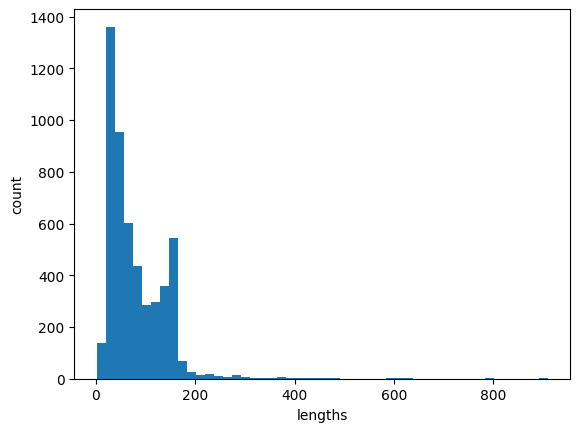

In [53]:
plt.hist(lengths, bins = 50)
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

In [54]:
X_train_padding = pad_sequences(X_train_encoded, maxlen = max_lengths)

In [55]:
X_train_padding

array([[   0,    0,    0, ...,    3,   17,   39],
       [   0,    0,    0, ...,  137,    2, 2326],
       [   0,    0,    0, ...,  186,  122, 1512],
       ...,
       [   0,    0,    0, ...,    2,   18, 1604],
       [   0,    0,    0, ..., 1297,  560,  122],
       [   0,    0,    0, ...,   12, 7820, 7821]])

In [56]:
embedding_dim = 8
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(X_train_padding, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
52/52 [==============================] - 3s 32ms/step - loss: 0.5113 - acc: 0.8026 - val_loss: 0.3745 - val_acc: 0.8779
Epoch 2/5
52/52 [==============================] - 1s 25ms/step - loss: 0.3535 - acc: 0.8779 - val_loss: 0.4498 - val_acc: 0.9444
Epoch 3/5
52/52 [==============================] - 1s 25ms/step - loss: 0.2530 - acc: 0.9205 - val_loss: 0.1345 - val_acc: 0.9698
Epoch 4/5
52/52 [==============================] - 1s 24ms/step - loss: 0.0943 - acc: 0.9782 - val_loss: 0.1237 - val_acc: 0.9516
Epoch 5/5
52/52 [==============================] - 1s 28ms/step - loss: 0.0583 - acc: 0.9849 - val_loss: 0.0801 - val_acc: 0.9746


In [57]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padding = pad_sequences(X_test_encoded, maxlen = max_lengths)
accuracy = model.evaluate(X_test_padding, y_test)[1]
print(accuracy)

33/33 [==============================] - 0s 6ms/step - loss: 0.0886 - acc: 0.9729
0.9729207158088684


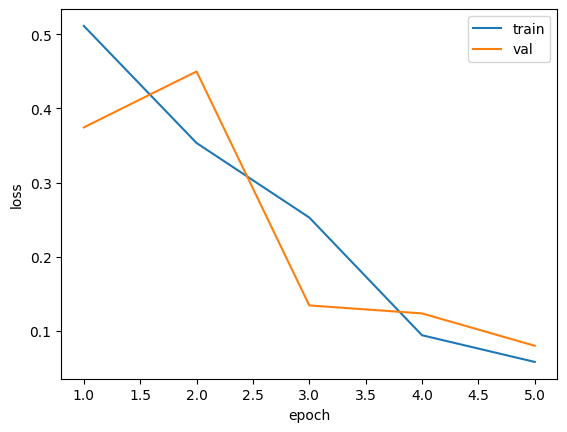

In [59]:
epochs = range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential


## 🌼마무리 문제

스팸메일 분류의 정확도를 더 개선해보세요!  